<h4> Les algorithmes à tester sont </h4>
<h5>KNN, NB, XGBoost, GradientBoosting, AdaBoost, lightGBM</h5>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("heart_2022_no_nans.csv")
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [4]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['PhysicalHealthDays',
 'MentalHealthDays',
 'SleepHours',
 'HeightInMeters',
 'WeightInKilograms',
 'BMI']

In [5]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['State',
 'Sex',
 'GeneralHealth',
 'LastCheckupTime',
 'PhysicalActivities',
 'RemovedTeeth',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos']

<Axes: title={'center': 'Répartition de la variable cible'}, ylabel='count'>

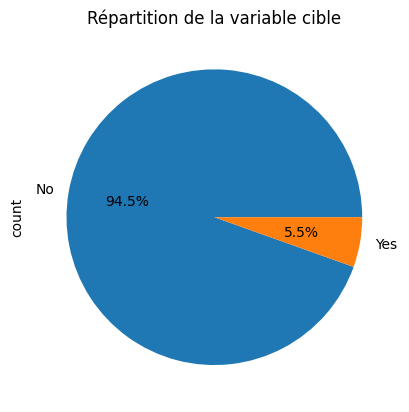

In [6]:
df["HadHeartAttack"].value_counts().plot(kind="pie", autopct="%1.1f%%", title="Répartition de la variable cible")

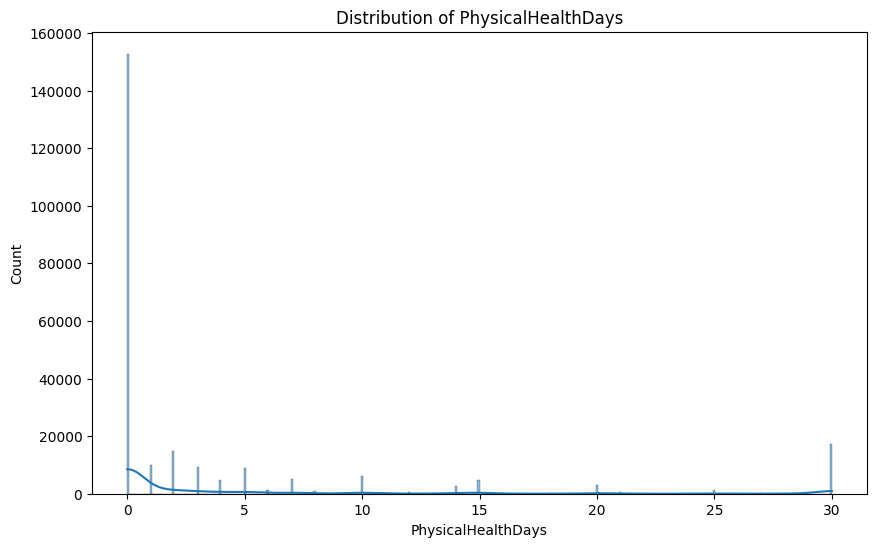

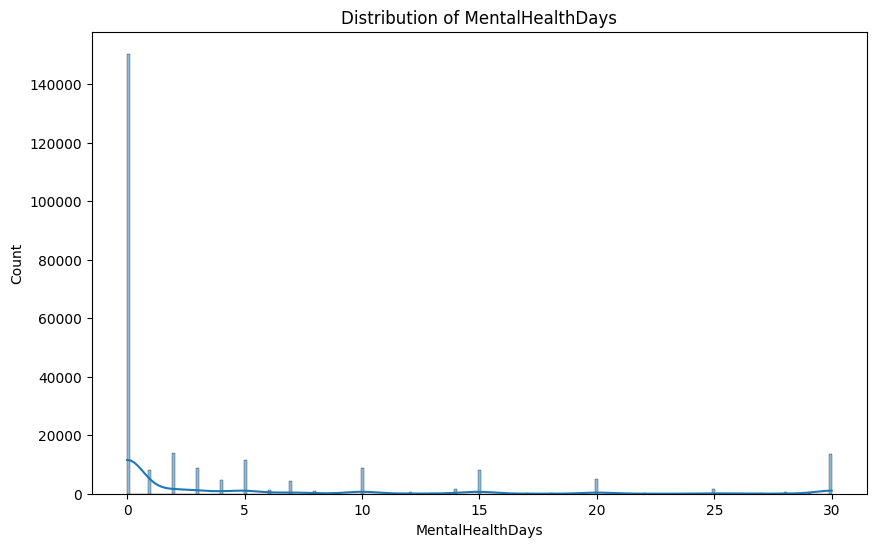

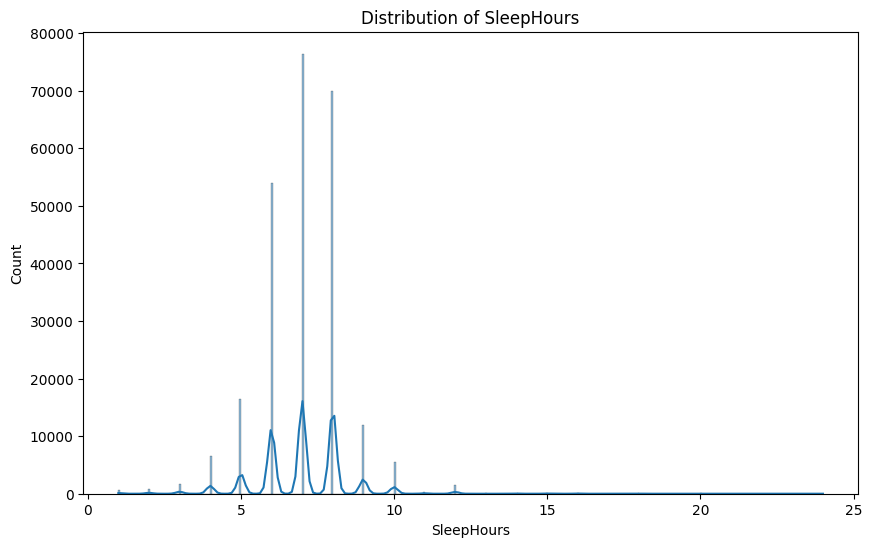

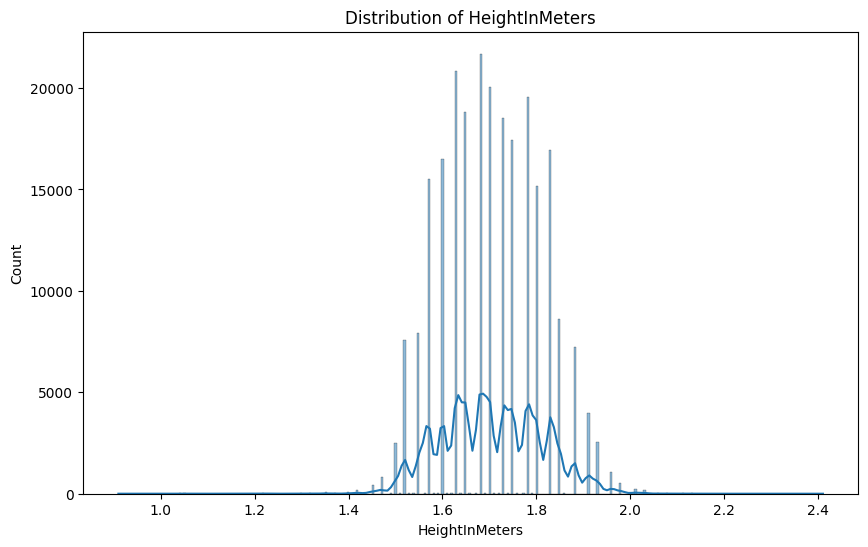

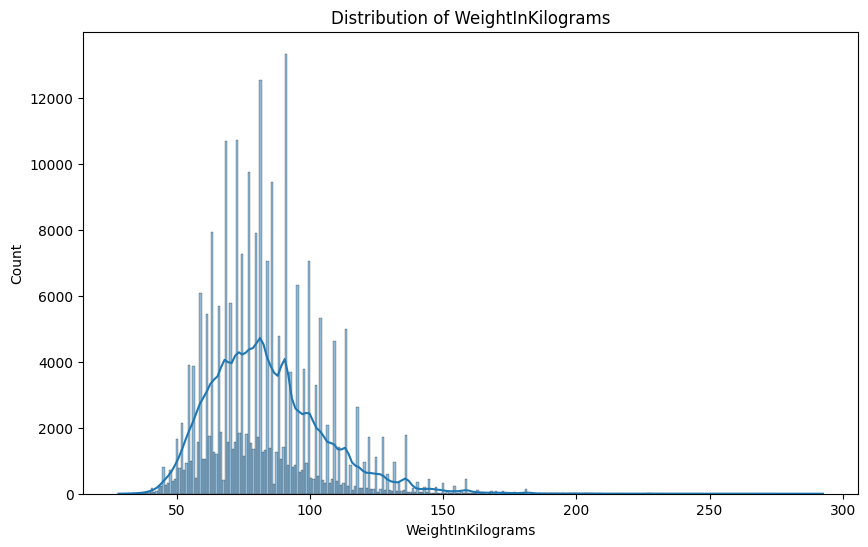

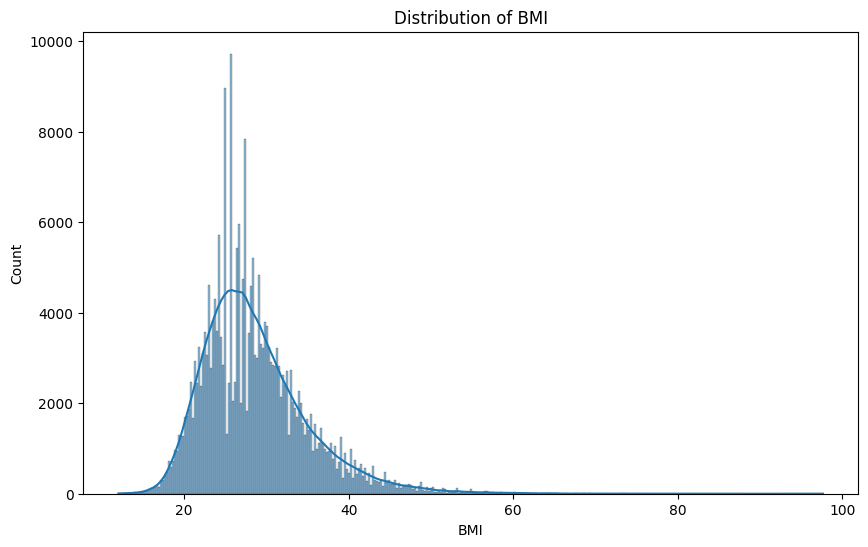

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

<h4> Data Preprocessing </h4>

<h5> Encoding Categorical Variables </h5>

In [8]:
le = LabelEncoder()

df['HadHeartAttack'] = le.fit_transform(df['HadHeartAttack'])

In [9]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Iterate over each column in the DataFrame
for column in df.columns:
    # Check if the column is of object type (categorical)
    if df[column].dtype == 'object':
        # Encode the values in the column
        df[column] = le.fit_transform(df[column])

In [10]:
X = df.drop("HadHeartAttack", axis=1)
y = df["HadHeartAttack"]

In [11]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,0,4,4.0,0.0,3,1,9.0,3,0,...,1.60,71.67,27.99,0,0,1,1,1,0,0
1,0,1,4,0.0,0.0,3,1,6.0,3,0,...,1.78,95.25,30.13,0,0,1,1,2,0,0
2,0,1,4,0.0,0.0,3,0,8.0,1,0,...,1.85,108.86,31.66,1,0,0,1,0,0,2
3,0,0,1,5.0,0.0,3,1,9.0,3,0,...,1.70,90.72,31.32,0,0,1,1,0,0,2
4,0,0,2,3.0,15.0,3,1,5.0,0,0,...,1.55,79.38,33.07,0,0,1,1,0,0,0


In [12]:
df['HadHeartAttack'] #No 0 Yes 1

0         0
1         0
2         0
3         0
4         0
         ..
246017    0
246018    0
246019    0
246020    0
246021    1
Name: HadHeartAttack, Length: 246022, dtype: int32

<h5> Splitting the data </h5>
<p>

- Overfitting Prevention: If we train and test the models on the same data, we would always get a perfect score but fail to predict anything useful on yet-unseen data. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set.
- Model Generalization: By splitting the dataset into training and test sets, we can train our model on the training set and then test how well it can generalize to new, unseen data in the test set. </p>

In [13]:
from sklearn.model_selection import train_test_split

#split into training set and temporary set
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#split the temporary set into testing and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Now you have your training set, validation set, and testing set.
# X_train, X_val, and X_test contain the features
# y_train, y_val, and y_test contain the labels

<h5> Feature Scaling </h5>
<p>  Feature scaling is a crucial step in many machine learning algorithms. The main idea is to normalize/standardize (mean = 0 and standard deviation = 1) your features/variables before applying machine learning techniques.

The reasons why feature scaling is important are:

- Speed of Convergence: Algorithms that use gradient descent as an optimization technique require much less time to find the local minimum when the features are scaled, thus speeding up the algorithm's learning.

- Avoiding Dominance: If one feature has a broad range of values, the distance will be governed by this particular feature, so the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

- Algorithms that Use Distance Measures: Some algorithms like KNN, K-means, and SVM use the Euclidean distance measure for different purposes. If one of the features has a broad range of values, the distance will be governed by this particular feature.

<br> Do Normalization after splitting into train and test/validation. The reason is to avoid any data leakage.

Data Leakage:

Data leakage is when information from outside the training dataset is used to create the model. This additional information can allow the model to learn or know something that it otherwise would not know and in turn invalidate the estimated performance of the mode being constructed </p>

In [14]:
from sklearn.preprocessing import StandardScaler

# Create the scaler object and fit it to the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Use the scaler to transform the training, validation, and test sets
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

<h4> Balancing the data </h4>
<p> When you're balancing your data, especially if you're using a method like SMOTE that creates synthetic samples, you're changing the underlying distribution of your data. This new distribution is what you want your model to learn from. Therefore, it makes sense to perform feature selection on this distribution, rather than the original, imbalanced distribution </p>

In [15]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

<h5> Feature Selection </h5>
<p> Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested. The benefits of performing feature selection before modeling your data are:

- Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
- Improves Accuracy: Less misleading data means modeling accuracy improves.
- Reduces Training Time: Fewer data points reduce algorithm complexity and algorithms train faster. </p>

In [16]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# # feature extraction
# test = SelectKBest(score_func=chi2, k=4)
# fit = test.fit(X_train_res, y_train_res)

# # summarize scores
# np.set_printoptions(precision=3)
# print(fit.scores_)

# # Create a new dataset with the selected features
# X_train_selected_chi2 = fit.transform(X_train_res)

# # If you want to apply the same feature selection to the test set:
# X_test_selected_chi2 = fit.transform(X_test)

In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model)
fit = rfe.fit(X_train_res, y_train_res)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
selected_features = fit.support_

# Create a new dataset with the selected features
X_train_selected_rfe = fit.transform(X_train_res)
X_val_selected_rfe = fit.transform(X_val)
X_test_selected_rfe = rfe.transform(X_test)

Num Features: 19
Selected Features: [False  True False False False  True False  True  True  True  True False
  True  True False False False  True False  True  True  True False  True
  True False  True False  True  True False False  True False  True False
 False False False]
Feature Ranking: [12  1  9  5 16  1 19  1  1  1  1 14  1  1 15  3  7  1 21  1  1  1 20  1
  1 18  1  6  1  1 17 11  1 10  1  8 13  2  4]


In [18]:
from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components=0.95)
fit = pca.fit(X_train_res)

# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print("Number of PCA components: ", fit.n_components_)
print(fit.components_)

# Create a new dataset with the principal components
X_train_pca = fit.transform(X_train_res)

# If you want to apply the same PCA to the test and validation set:
X_test_pca = fit.transform(X_test)
X_val_pca = fit.transform(X_val)


Explained Variance: [0.14775334 0.08076379 0.05114238 0.04622762 0.0434929  0.03896583
 0.03675079 0.03405275 0.03060928 0.02916531 0.02602359 0.02447267
 0.02339659 0.02279574 0.02173329 0.02089916 0.02037146 0.01948594
 0.01888571 0.01839737 0.01792215 0.01742446 0.0170204  0.01677562
 0.0161886  0.01594261 0.015326   0.01486958 0.01441435 0.01415244
 0.01334615 0.01279622 0.01241589]
Number of PCA components:  33
[[ 0.00140561  0.00059995 -0.0338646  ...  0.00754052 -0.02087906
  -0.01746162]
 [ 0.00377228 -0.15876262 -0.01553188 ... -0.03167572  0.07648063
   0.05951857]
 [ 0.00903484  0.27804097 -0.00590337 ...  0.06161588  0.07935636
   0.08907958]
 ...
 [ 0.07250404  0.04504401  0.02355826 ...  0.11484327 -0.11629035
   0.01893122]
 [ 0.03194571  0.06326166  0.15065303 ...  0.06899448 -0.07070526
   0.04153187]
 [ 0.00463347 -0.04887084  0.05558579 ... -0.00601887 -0.06382218
   0.01425605]]


In [19]:
from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X_train_res, y_train_res)
print(model.feature_importances_)

# Get feature importances
importances = model.feature_importances_

# Get the indices of the features sorted by importance
indices = np.argsort(importances)[::-1]

# Select the top 3 features
selected_features = indices[:3]

# Create a new dataset with the selected features
X_train_selected_extraTrees = X_train_res[:, selected_features]

# If you want to apply the same feature selection to the test set:
X_test_selected_extraTress = X_test[:, selected_features]
X_val_selected_extraTress = X_val[:, selected_features]

[0.01684069 0.03727405 0.03865368 0.01571588 0.01078146 0.00876819
 0.01403455 0.01465119 0.03994187 0.15206255 0.02177862 0.00910945
 0.00739259 0.01342444 0.01131787 0.00890988 0.03485265 0.02067921
 0.00893251 0.00523583 0.00770741 0.02877841 0.003256   0.00522507
 0.02438165 0.01167455 0.14350668 0.0118034  0.09349134 0.01591492
 0.01462654 0.01448356 0.0283221  0.02096639 0.01973395 0.02806825
 0.02097528 0.00240523 0.0143221 ]


<h4> Fitting the models </h4>

In [20]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [21]:
# Model Instances
rf = RandomForestClassifier(random_state=42)
logreg = LogisticRegression(random_state=42)
svc = SVC(probability=True, random_state=42)  # probability=True for possible ROC AUC calculations
knn = KNeighborsClassifier(n_neighbors=5)
gaussian_nb = GaussianNB()
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
adaboost = AdaBoostClassifier(random_state=0)
gradient_boosting = GradientBoostingClassifier(random_state=42)

In [22]:
results = {}

In [23]:
#RandomForest Evaluations
results['RandomForest'] = {}
rf.fit(X_train_selected_rfe, y_train_res)
results['RandomForest']['RFE'] = classification_report(y_test, rf.predict(X_test_selected_rfe), output_dict=True)
rf.fit(X_train_pca, y_train_res)
results['RandomForest']['PCA'] = classification_report(y_test, rf.predict(X_test_pca), output_dict=True)
rf.fit(X_train_selected_extraTrees, y_train_res)
results['RandomForest']['ExtraTrees'] = classification_report(y_test, rf.predict(X_test_selected_extraTress), output_dict=True)

from pprint import pprint
pprint(results)

{'RandomForest': {'ExtraTrees': {'0': {'f1-score': 0.9686999344107179,
                                       'precision': 0.9701916864096489,
                                       'recall': 0.9672127627595388,
                                       'support': 46573.0},
                                 '1': {'f1-score': 0.461623820972813,
                                       'precision': 0.44972972972972974,
                                       'recall': 0.47416413373860183,
                                       'support': 2632.0},
                                 'accuracy': 0.9408393455949599,
                                 'macro avg': {'f1-score': 0.7151618776917654,
                                               'precision': 0.7099607080696894,
                                               'recall': 0.7206884482490703,
                                               'support': 49205.0},
                                 'weighted avg': {'f1-score': 0.9415761801058999,
     

In [24]:
# LogisticRegression Evaluations
results['LogisticRegression'] = {}
logreg.fit(X_train_selected_rfe, y_train_res)
results['LogisticRegression']['RFE'] = classification_report(y_test, logreg.predict(X_test_selected_rfe), output_dict=True)
logreg.fit(X_train_pca, y_train_res)
results['LogisticRegression']['PCA'] = classification_report(y_test, logreg.predict(X_test_pca), output_dict=True)
logreg.fit(X_train_selected_extraTrees, y_train_res)
results['LogisticRegression']['ExtraTrees'] = classification_report(y_test, logreg.predict(X_test_selected_extraTress), output_dict=True)

from pprint import pprint
pprint(results)

{'LogisticRegression': {'ExtraTrees': {'0': {'f1-score': 0.8772067291139841,
                                             'precision': 0.9810398852833395,
                                             'recall': 0.7932493075387027,
                                             'support': 46573.0},
                                       '1': {'f1-score': 0.270540940827985,
                                             'precision': 0.16610374989174678,
                                             'recall': 0.7287234042553191,
                                             'support': 2632.0},
                                       'accuracy': 0.7897977847779697,
                                       'macro avg': {'f1-score': 0.5738738349709845,
                                                     'precision': 0.5735718175875432,
                                                     'recall': 0.7609863558970109,
                                                     'support': 49205.0},
          

<h4> SVC disadvantages </h4>

- Poor performance with large datasets: SVMs can be inefficient to train with very large datasets.

- No probability estimates: SVMs do not directly provide probability estimates. These are calculated using an expensive five-fold cross-validation.

- Sensitive to noise: A relatively small number of mislabeled examples can dramatically decrease the performance.

- Requires feature scaling: SVMs are not scale invariant, so it requires scaling of the data.

In [ ]:
# results['SVC'] = {}
# svc.fit(X_train_selected_rfe, y_train_res)
# results['SVC']['RFE'] = classification_report(y_test, svc.predict(X_test_selected_rfe), output_dict=True)
# svc.fit(X_train_pca, y_train_res)
# results['SVC']['PCA'] = classification_report(y_test, svc.predict(X_test_pca), output_dict=True)
# svc.fit(X_train_selected_extraTrees, y_train_res)
# results['SVC']['ExtraTrees'] = classification_report(y_test, svc.predict(X_test_selected_extraTress), output_dict=True)

# from pprint import pprint
# pprint(results)

In [42]:
results['KNN'] = {}
knn.fit(X_train_selected_rfe, y_train_res)
results['KNN']['RFE'] = classification_report(y_test, knn.predict(X_test_selected_rfe), output_dict=True)
knn.fit(X_train_pca, y_train_res)
results['KNN']['PCA'] = classification_report(y_test, knn.predict(X_test_pca), output_dict=True)
knn.fit(X_train_selected_extraTrees, y_train_res)
results['KNN']['ExtraTrees'] = classification_report(y_test, knn.predict(X_test_selected_extraTress), output_dict=True)

from pprint import pprint
pprint(results)

{'AdaBoost': {'ExtraTrees': {'0': {'f1-score': 0.9682671289666088,
                                   'precision': 0.9711638154484189,
                                   'recall': 0.9653876709681575,
                                   'support': 46573.0},
                             '1': {'f1-score': 0.4681465439451363,
                                   'precision': 0.4458576830525954,
                                   'recall': 0.4927811550151976,
                                   'support': 2632.0},
                             'accuracy': 0.9401077126308302,
                             'macro avg': {'f1-score': 0.7182068364558726,
                                           'precision': 0.7085107492505072,
                                           'recall': 0.7290844129916776,
                                           'support': 49205.0},
                             'weighted avg': {'f1-score': 0.9415154293471288,
                                              'precision': 0.9

In [27]:
results['GaussianNB'] = {}
gaussian_nb.fit(X_train_selected_rfe, y_train_res)
results['GaussianNB']['RFE'] = classification_report(y_test, gaussian_nb.predict(X_test_selected_rfe), output_dict=True)
gaussian_nb.fit(X_train_pca, y_train_res)
results['GaussianNB']['PCA'] = classification_report(y_test, gaussian_nb.predict(X_test_pca), output_dict=True)
gaussian_nb.fit(X_train_selected_extraTrees, y_train_res)
results['GaussianNB']['ExtraTrees'] = classification_report(y_test, gaussian_nb.predict(X_test_selected_extraTress), output_dict=True)

from pprint import pprint
pprint(results)

{'GaussianNB': {'ExtraTrees': {'0': {'f1-score': 0.8771267438409024,
                                     'precision': 0.9810368639116116,
                                     'recall': 0.7931204775298993,
                                     'support': 46573.0},
                               '1': {'f1-score': 0.2704265068734579,
                                     'precision': 0.16601748463602528,
                                     'recall': 0.7287234042553191,
                                     'support': 2632.0},
                               'accuracy': 0.7896758459506148,
                               'macro avg': {'f1-score': 0.5737766253571801,
                                             'precision': 0.5735271742738184,
                                             'recall': 0.7609219408926092,
                                             'support': 49205.0},
                               'weighted avg': {'f1-score': 0.844674045462723,
                                  

In [28]:
results['XGBOOST'] = {}
xgboost.fit(X_train_selected_rfe, y_train_res)
results['XGBOOST']['RFE'] = classification_report(y_test, xgboost.predict(X_test_selected_rfe), output_dict=True)
xgboost.fit(X_train_pca, y_train_res)
results['XGBOOST']['PCA'] = classification_report(y_test, xgboost.predict(X_test_pca), output_dict=True)
xgboost.fit(X_train_selected_extraTrees, y_train_res)
results['XGBOOST']['ExtraTrees'] = classification_report(y_test, xgboost.predict(X_test_selected_extraTress), output_dict=True)

from pprint import pprint
pprint(results)

{'GaussianNB': {'ExtraTrees': {'0': {'f1-score': 0.8771267438409024,
                                     'precision': 0.9810368639116116,
                                     'recall': 0.7931204775298993,
                                     'support': 46573.0},
                               '1': {'f1-score': 0.2704265068734579,
                                     'precision': 0.16601748463602528,
                                     'recall': 0.7287234042553191,
                                     'support': 2632.0},
                               'accuracy': 0.7896758459506148,
                               'macro avg': {'f1-score': 0.5737766253571801,
                                             'precision': 0.5735271742738184,
                                             'recall': 0.7609219408926092,
                                             'support': 49205.0},
                               'weighted avg': {'f1-score': 0.844674045462723,
                                  

In [29]:
results['AdaBoost'] = {}
adaboost.fit(X_train_selected_rfe, y_train_res)
results['AdaBoost']['RFE'] = classification_report(y_test, adaboost.predict(X_test_selected_rfe), output_dict=True)
adaboost.fit(X_train_pca, y_train_res)
results['AdaBoost']['PCA'] = classification_report(y_test, adaboost.predict(X_test_pca), output_dict=True)
adaboost.fit(X_train_selected_extraTrees, y_train_res)
results['AdaBoost']['ExtraTrees'] = classification_report(y_test, adaboost.predict(X_test_selected_extraTress), output_dict=True)

from pprint import pprint
pprint(results)


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'AdaBoost': {'ExtraTrees': {'0': {'f1-score': 0.9682671289666088,
                                   'precision': 0.9711638154484189,
                                   'recall': 0.9653876709681575,
                                   'support': 46573.0},
                             '1': {'f1-score': 0.4681465439451363,
                                   'precision': 0.4458576830525954,
                                   'recall': 0.4927811550151976,
                                   'support': 2632.0},
                             'accuracy': 0.9401077126308302,
                             'macro avg': {'f1-score': 0.7182068364558726,
                                           'precision': 0.7085107492505072,
                                           'recall': 0.7290844129916776,
                                           'support': 49205.0},
                             'weighted avg': {'f1-score': 0.9415154293471288,
                                              'precision': 0.9

In [36]:
pprint(results['AdaBoost']['RFE'])

{'0': {'f1-score': 0.9612019366464751,
       'precision': 0.9720496212537051,
       'recall': 0.9505936916239023,
       'support': 46573.0},
 '1': {'f1-score': 0.43197711379529563,
       'precision': 0.37131147540983606,
       'recall': 0.5163373860182371,
       'support': 2632.0},
 'accuracy': 0.9273651051722386,
 'macro avg': {'f1-score': 0.6965895252208854,
               'precision': 0.6716805483317706,
               'recall': 0.7334655388210697,
               'support': 49205.0},
 'weighted avg': {'f1-score': 0.9328934368244183,
                  'precision': 0.93991583810441,
                  'recall': 0.9273651051722386,
                  'support': 49205.0}}


In [30]:
results['GradientBoost'] = {}
gradient_boosting.fit(X_train_selected_rfe, y_train_res)
results['GradientBoost']['RFE'] = classification_report(y_test, gradient_boosting.predict(X_test_selected_rfe), output_dict=True)
gradient_boosting.fit(X_train_pca, y_train_res)
results['GradientBoost']['PCA'] = classification_report(y_test, gradient_boosting.predict(X_test_pca), output_dict=True)
gradient_boosting.fit(X_train_selected_extraTrees, y_train_res)
results['GradientBoost']['ExtraTrees'] = classification_report(y_test, gradient_boosting.predict(X_test_selected_extraTress), output_dict=True)

from pprint import pprint
pprint(results)

{'AdaBoost': {'ExtraTrees': {'0': {'f1-score': 0.9682671289666088,
                                   'precision': 0.9711638154484189,
                                   'recall': 0.9653876709681575,
                                   'support': 46573.0},
                             '1': {'f1-score': 0.4681465439451363,
                                   'precision': 0.4458576830525954,
                                   'recall': 0.4927811550151976,
                                   'support': 2632.0},
                             'accuracy': 0.9401077126308302,
                             'macro avg': {'f1-score': 0.7182068364558726,
                                           'precision': 0.7085107492505072,
                                           'recall': 0.7290844129916776,
                                           'support': 49205.0},
                             'weighted avg': {'f1-score': 0.9415154293471288,
                                              'precision': 0.9

In [43]:
from pprint import pprint

# Print the top-level keys (dataset names)
pprint(list(results.keys()))

# Print the second-level keys (model names) for the first dataset, adjust if necessary
first_dataset_key = next(iter(results))
pprint(list(results[first_dataset_key].keys()))

# Print the structure of the metrics stored for the first model in the first dataset
first_model_key = next(iter(results[first_dataset_key]))
pprint(results[first_dataset_key][first_model_key])


['RandomForest',
 'LogisticRegression',
 'GaussianNB',
 'XGBOOST',
 'AdaBoost',
 'GradientBoost',
 'KNN']
['RFE', 'PCA', 'ExtraTrees']
{'0': {'f1-score': 0.9701251170312367,
       'precision': 0.9614711402602333,
       'recall': 0.9789362935606467,
       'support': 46573.0},
 '1': {'f1-score': 0.3644182888184699,
       'precision': 0.4507278835386338,
       'recall': 0.3058510638297872,
       'support': 2632.0},
 'accuracy': 0.9429326287978864,
 'macro avg': {'f1-score': 0.6672717029248533,
               'precision': 0.7060995118994335,
               'recall': 0.6423936786952169,
               'support': 49205.0},
 'weighted avg': {'f1-score': 0.9377255565829895,
                  'precision': 0.9341512286315116,
                  'recall': 0.9429326287978864,
                  'support': 49205.0}}


In [44]:
data = []

for model_name, datasets in results.items():
    for dataset_name, metrics in datasets.items():
        accuracy = metrics['accuracy']
        precision = metrics['weighted avg']['precision']
        recall = metrics['weighted avg']['recall']
        f1 = metrics['weighted avg']['f1-score']

        data.append({
            'Model': model_name,
            'Dataset': dataset_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })

df_results = pd.DataFrame(data)

print(df_results)


                 Model     Dataset  Accuracy  Precision    Recall  F1 Score
0         RandomForest         RFE  0.942933   0.934151  0.942933  0.937726
1         RandomForest         PCA  0.930353   0.939308  0.930353  0.934408
2         RandomForest  ExtraTrees  0.940839   0.942352  0.940839  0.941576
3   LogisticRegression         RFE  0.824896   0.942079  0.824896  0.868429
4   LogisticRegression         PCA  0.827741   0.941094  0.827741  0.870150
5   LogisticRegression  ExtraTrees  0.789798   0.937449  0.789798  0.844756
6           GaussianNB         RFE  0.817701   0.940159  0.817701  0.863468
7           GaussianNB         PCA  0.798598   0.937674  0.798598  0.850611
8           GaussianNB  ExtraTrees  0.789676   0.937441  0.789676  0.844674
9              XGBOOST         RFE  0.948623   0.937025  0.948623  0.940009
10             XGBOOST         PCA  0.864282   0.936166  0.864282  0.892691
11             XGBOOST  ExtraTrees  0.940331   0.942717  0.940331  0.941477
12          

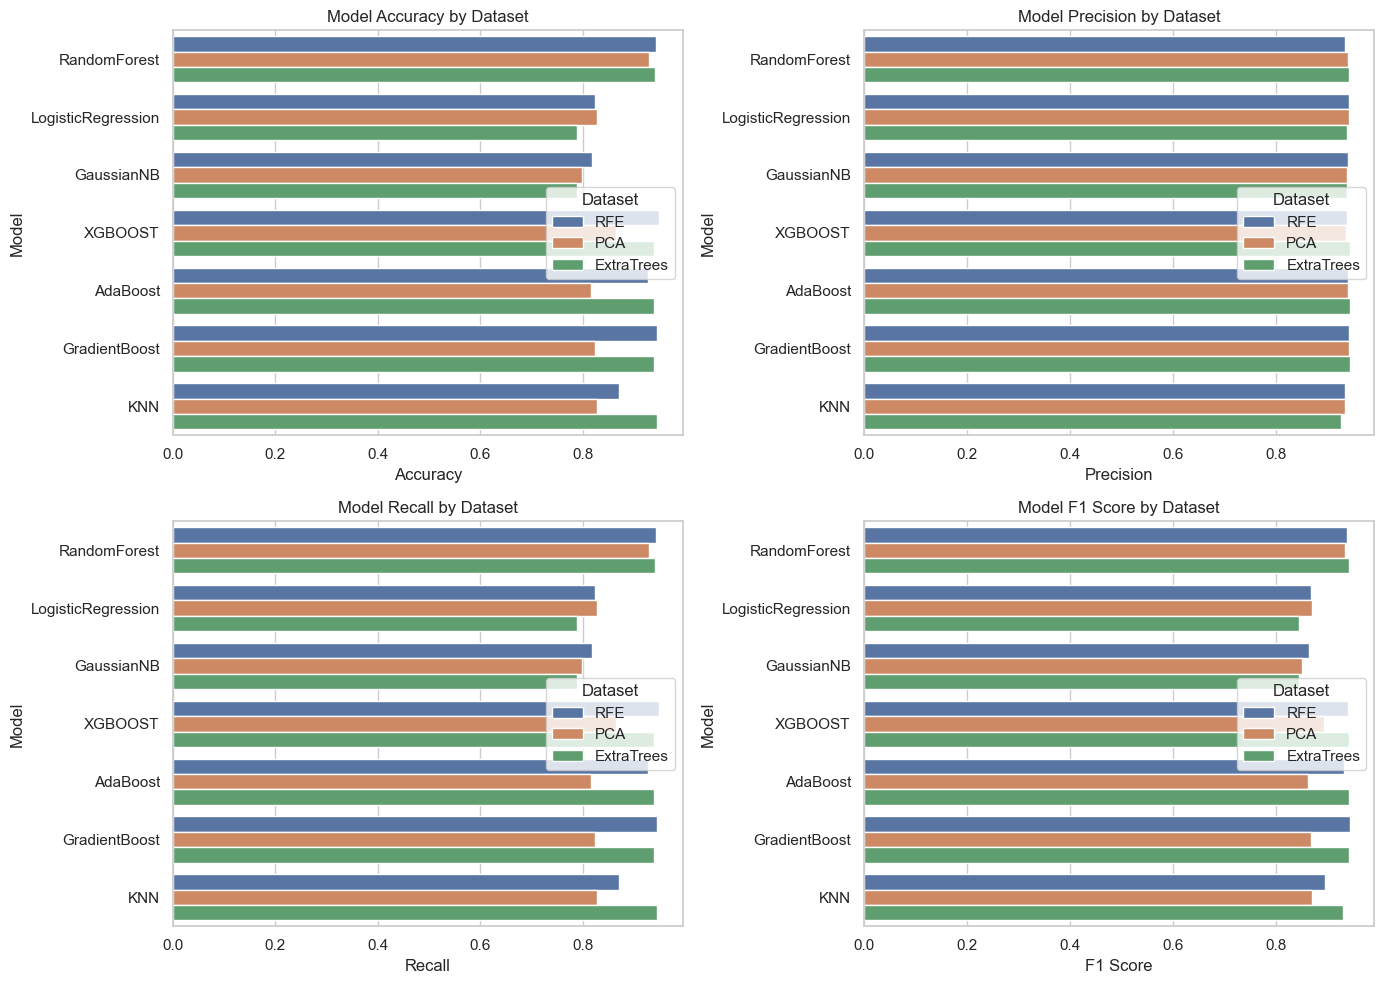

In [45]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(2, 2, figsize=(14, 10))  # Adjust size as needed

# Plot Accuracy
sns.barplot(x='Accuracy', y='Model', hue='Dataset', data=df_results, ax=ax[0, 0])
ax[0, 0].set_title('Model Accuracy by Dataset')

# Plot Precision
sns.barplot(x='Precision', y='Model', hue='Dataset', data=df_results, ax=ax[0, 1])
ax[0, 1].set_title('Model Precision by Dataset')

# Plot Recall
sns.barplot(x='Recall', y='Model', hue='Dataset', data=df_results, ax=ax[1, 0])
ax[1, 0].set_title('Model Recall by Dataset')

# Plot F1 Score
sns.barplot(x='F1 Score', y='Model', hue='Dataset', data=df_results, ax=ax[1, 1])
ax[1, 1].set_title('Model F1 Score by Dataset')

plt.tight_layout()

plt.show()

In [47]:
from sklearn.model_selection import GridSearchCV

models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 5, 10]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'C': [0.1, 1, 10]
        }
    },
    'KNeighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.1, 1]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=0),
        'params': {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.1, 1]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.1, 1]
        }
    }
}

for model_name, model_info in models.items():
        grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5)
        for dataset_name, X in datasets.items():
            grid_search.fit(X_train_selected_rfe, y_train_res)
        print(f'Best parameters for {model_name} on {dataset_name} dataset: {grid_search.best_params_}')
        print(f'Cross-validation accuracy: {grid_search.best_score_:.2f}')

Best parameters for RandomForest on ExtraTrees dataset: {'max_depth': None, 'n_estimators': 100}
Cross-validation accuracy: 0.97
Best parameters for LogisticRegression on ExtraTrees dataset: {'C': 0.1}
Cross-validation accuracy: 0.81
Best parameters for KNeighbors on ExtraTrees dataset: {'n_neighbors': 3}
Cross-validation accuracy: 0.93
Best parameters for GradientBoosting on ExtraTrees dataset: {'learning_rate': 1, 'n_estimators': 150}
Cross-validation accuracy: 0.96


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is depr

Best parameters for AdaBoost on ExtraTrees dataset: {'learning_rate': 1, 'n_estimators': 150}
Cross-validation accuracy: 0.95
Best parameters for XGBoost on ExtraTrees dataset: {'learning_rate': 1, 'n_estimators': 50}
Cross-validation accuracy: 0.96


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

scorer = make_scorer(f1_score)


models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 5, 10]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'C': [0.1, 1, 10]
        }
    },
    'KNeighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.1, 1]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=0),
        'params': {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.1, 1]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.1, 1]
        }
    }
}

for model_name, model_info in models.items():
        grid_search = GridSearchCV(model_info['model'], model_info['params'],scoring=scorer, cv=5)
        for dataset_name, X in datasets.items():
            grid_search.fit(X_train_pca, y_train_res)
        print(f'Best parameters for {model_name} on {dataset_name} dataset: {grid_search.best_params_}')
        print(f'Cross-validation accuracy: {grid_search.best_score_:.2f}')

Best parameters for RandomForest on ExtraTrees dataset: {'max_depth': None, 'n_estimators': 100}
Cross-validation accuracy: 0.96
Best parameters for LogisticRegression on ExtraTrees dataset: {'C': 1}
Cross-validation accuracy: 0.79
Best parameters for KNeighbors on ExtraTrees dataset: {'n_neighbors': 3}
Cross-validation accuracy: 0.93


In [ ]:
from sklearn.model_selection import GridSearchCV

models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 5, 10]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'C': [0.1, 1, 10]
        }
    },
    'KNeighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.1, 1]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=0),
        'params': {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.1, 1]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.1, 1]
        }
    }
}

for model_name, model_info in models.items():
        grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5)
        for dataset_name, X in datasets.items():
            grid_search.fit(X_train_selected_extraTrees, y_train_res)
        print(f'Best parameters for {model_name} on {dataset_name} dataset: {grid_search.best_params_}')
        print(f'Cross-validation accuracy: {grid_search.best_score_:.2f}')